In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

# Задача №1
## Условие:
(К теоретической задаче 1) Сгенерируйте $M=100$ выборок $X_1, ..., X_{1000}$ из равномерного распределения на отрезке $[0, \theta]$ (возьмите три произвольных положительных значения $\theta$). Для каждой выборки $X_1,\ldots,X_n$ для всех $n \leqslant 1000$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2 \overline{X}, (n + 1) X_{(1)}, X_{(1)} + X_{(n)}, \frac {n + 1} {n} X_{(n)}$. Посчитайте для всех полученых оценок $\hat\theta$ квадратичную функцию потерь $(\hat\theta-\theta)^2$ и для каждого фиксированного $n$ усредните по выборкам. Для каждого из трех значений $\theta$ постройте графики усредненных функций потерь в зависимости от $n$.

## Решение:
$$
R\left(2\overline{X}, \theta\right) = 
E_\theta\left( 2\overline{X}-\theta \right)^2 = \frac{\theta^2\left(3n+1\right)}{3n}
$$ 

$$
R\left((n+1)X_{(1)}, \theta\right) = 
E_\theta\left( (n+1)X_{(1)}-\theta \right)^2 = \frac{\theta^2n}{n+2}
$$

$$
R\left(\frac {n + 1} {n} X_{(n)}, \theta\right) = 
E_\theta\left( \frac {n + 1} {n} X_{(n)}-\theta \right)^2 = \frac{\theta^2}{n(n+2)}
$$ 

Таким образом,

$$
R\left(\frac {n + 1} {n} X_{(n)}, \theta\right) \leq R\left(2\overline{X}, \theta\right) \leq R\left((n+1)X_{(1)}, \theta\right) 
$$

То есть можно выдвинуть гипотезу, что оценка $(n+1)X_{(1)}$ будет хуже остальных

In [0]:
# получаем для данного theta усредненные по выборкам значения
# квадратичной функции потерь
def get_means(theta, M, N):
    # Получаем выборку из распределения U[0, theta] размера M*N
    X = sps.uniform(0, theta).rvs((M, N))
    
    # Вычисляем различные оценки (в том же порядке, что и в условии)
    estimations = [
        2 * np.cumsum(X, axis=-1) / np.arange(1, N + 1),
        np.arange(2, N + 2) * np.minimum.accumulate(X, axis=-1),
        np.minimum.accumulate(X, axis=-1) + np.maximum.accumulate(X, axis=-1),
        np.arange(2, N + 2) / np.arange(1, N + 1) * np.maximum.accumulate(X, axis=-1)
    ]
    # приводим к типу numpy array
    estimations = np.asarray(estimations)
    
    # Запишем эти оценки чтобы отобразить на графике
    labels = [
        '$2\\overline{X}$',
        '$(n + 1)X_{(1)}$',
        '$X_{(1)} + X_{(n)}$',
        '$\\frac{n + 1}{n} X_{(n)}$'
    ]
    
    # для всех полученых оценок вычисляем квадратичную функцию потерь
    loss = (estimations - theta)**2
    
    # считаем среднее по выборкам
    means = loss.mean(axis=1)
        
    return means, labels

# отображаем на графике усредненные функции потерь в зависимости от n
def show_means(means, labels, ylim=None):
    plt.figure(figsize=(14, 6))
    lineObjects = plt.plot(means.T)
    
    plt.legend(lineObjects, labels, fontsize=18)
    plt.xlabel('$N$', fontsize=18)
    plt.ylabel('$loss$', fontsize=18)
    
    plt.ylim(ylim)

    plt.show()

$$X_i \sim U[0, 1]$$

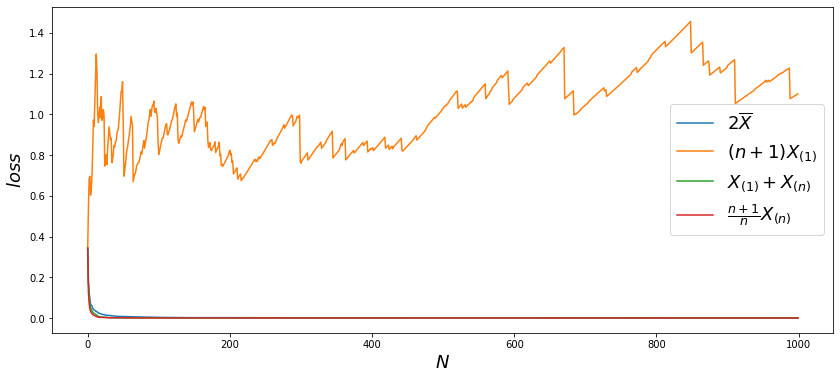

In [0]:
# Получаем значения усредненных функций потерь для theta=1
means, labels = get_means(theta=1, M=100, N=1000)
show_means(means, labels)

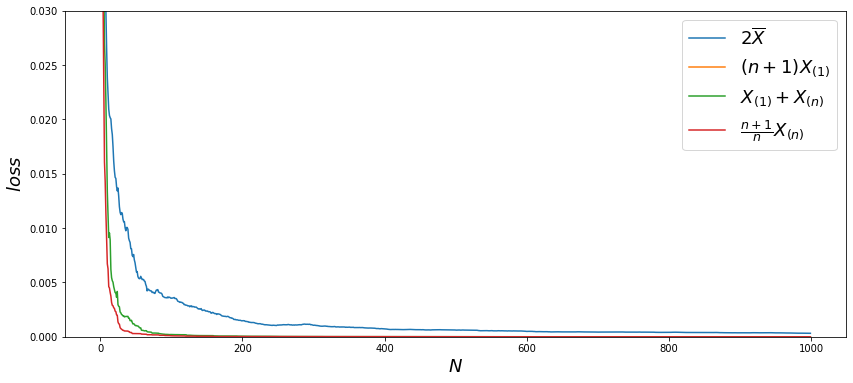

In [0]:
# Рассмотрим график в окрестности нуля по оси ординат
show_means(means, labels, ylim=(0, 0.03))

$$X_i \sim U[0, 5]$$

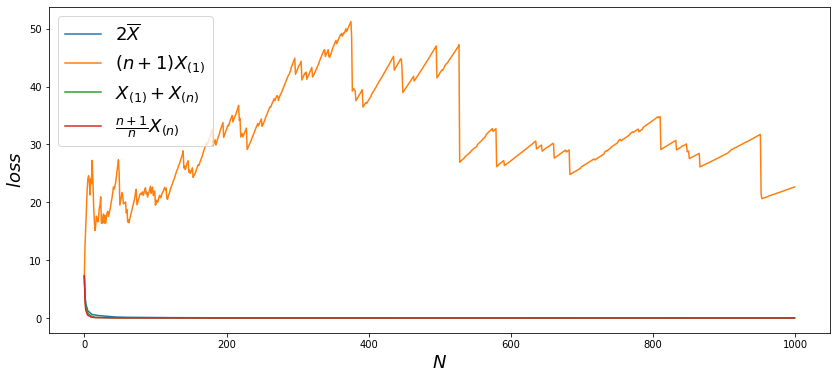

In [0]:
# аналогично для theta=5
means, labels = get_means(theta=5, M=100, N=1000)
show_means(means, labels)

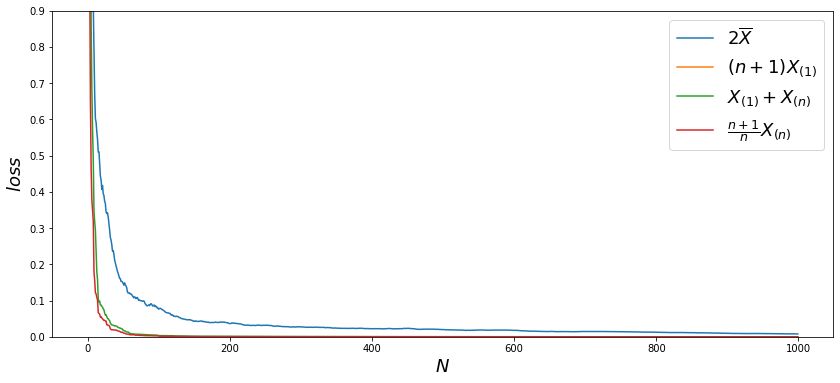

In [0]:
# Рассмотрим график в окрестности (теперь большей, чем в предыдущем примере) нуля по оси ординат
show_means(means, labels, ylim=(0, 0.9))

$$X_i \sim U[0, 20]$$

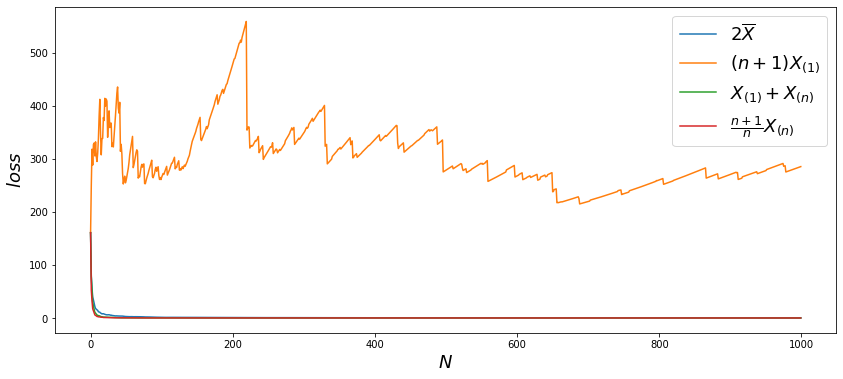

In [0]:
# аналогично для theta=20
means, labels = get_means(theta=20, M=100, N=1000)
show_means(means, labels)

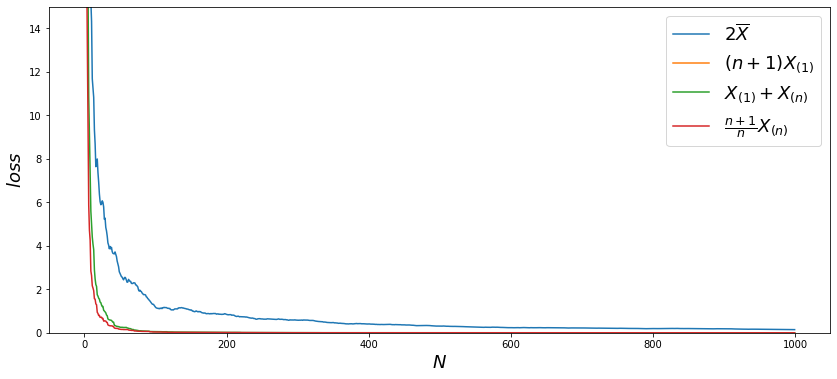

In [0]:
# Рассмотрим график в окрестности (теперь большей, чем в предыдущем примере) нуля по оси ординат
show_means(means, labels, ylim=(0, 15))

Гипотеза подтвердилась

# Задача №3
## Условие:
Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $\theta \in [0, 1]$ с шагом 0.01 постройте график зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. Какой можно сделать вывод (напишите в комментариях)? Для каждого значения $\theta$ (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$, посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии (параметрический бутстреп, количество бутстрепных выборок равно $500$) этой эффективной оценки $\theta$. Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

## Решение:
$$\tau\left(\theta\right)=\theta$$
Информация Фишера (распределение Бернулли):
$$i\left(\theta\right) = \frac{1}{\theta(1-\theta)}$$
Неравенство Крамера-Рао:
$$\mathrm{D}_{\theta} \theta^{*} \geq \frac{\left(\tau^{\prime}(\theta)\right)^{2}}{n i(\theta)}=\frac{1}{n i(\theta)}=\frac{\theta\left(1-\theta\right)}{n}$$
Эффективная оценка:
$$\theta^{*} = \overline{X}$$

In [0]:
def solve(n, a, b, delta, k):
    # получаем сетку значений параметра
    thetas = np.arange(a, b + delta, delta)

    # получаем выборки размера из распределения Бернулли с параметрами thetas
    X = sps.bernoulli.rvs(p=thetas, size=(n, len(thetas))).T

    # Считаем эффективную оценку - среднее для каждой выборки
    estimation = X.mean(axis=-1)
    
    # получаем k бутстрепных выборок размера n в параметрическом бутстрепе
    bootstrap_samples = sps.bernoulli.rvs(size=(len(thetas), k, n), p=estimation[:, None, None])

    # считаем среднее для каждой выборки
    estimations_bootstrap = bootstrap_samples.mean(axis=-1)

    # для каждого исходного значения параметра (из сетки) получаем бутстрепную оценку дисперсии
    var_bootstrap_estimation = np.var(estimations_bootstrap, axis=-1)
    
    # задаем параметры графика
    plt.figure(figsize=(14, 6))
    
    # строим график зависимости нижней оценки дисперсии произвольной несмещенной оценки из 
    # неравенства Рао-Крамера от 𝜃
    plt.plot(
        thetas,
        thetas * (1. - thetas) / n, 
        label='Из нер-ва Крамера-Рао'
    )
    # строим график зависимости полученных бутстрепных оценок от 𝜃
    plt.plot(
        thetas,
        var_bootstrap_estimation,
        label='Оценка дисперсии'
    )
    plt.legend()
    

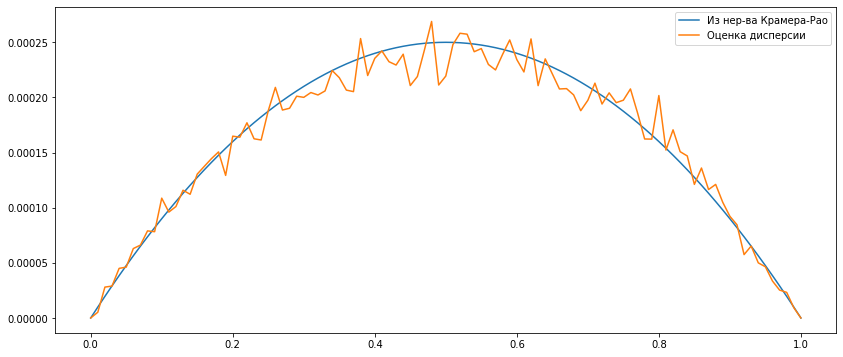

In [0]:
# Построим график с параметрами, данными в условии задачи
solve(n=1000, a=0, b=1, delta=0.01, k=500)

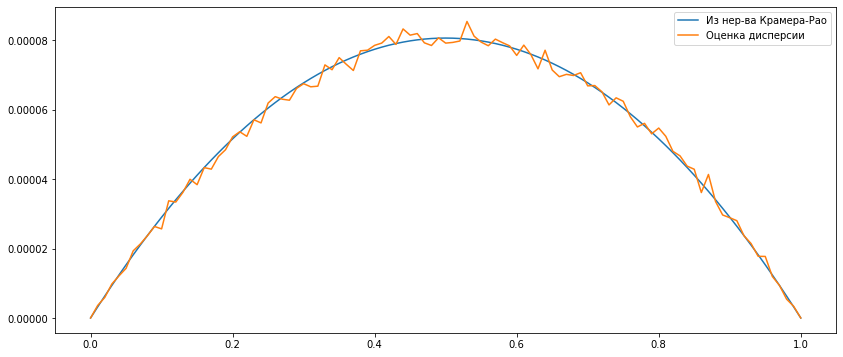

In [0]:
# Построим тот же график, немного увеличив количество и размер выборок 
solve(n=3100, a=0, b=1, delta=0.01, k=3500)